In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [8]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [9]:
df.shape, df.columns

((7043, 21),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: title={'center': 'Target Distribution (Churn)'}, xlabel='Churn'>

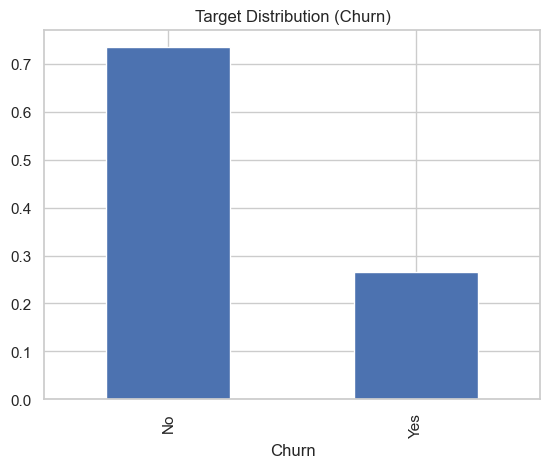

In [12]:
df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (Churn)')

In [13]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing
print("Missing values:\n", df.isnull().sum())

# Drop or fill NA
df = df.dropna()

# Drop customerID (not useful)
df = df.drop('customerID', axis=1)

Missing values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


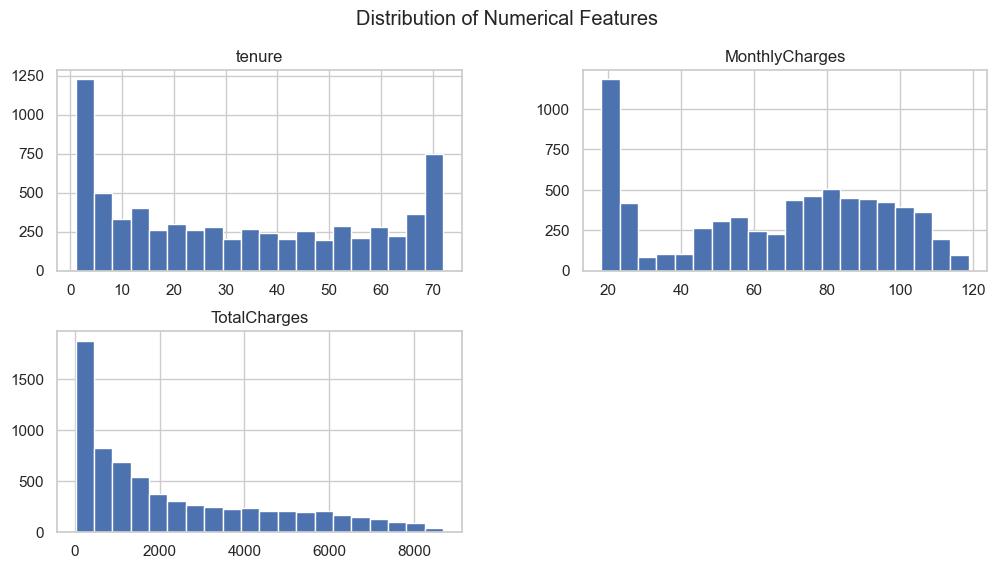

In [14]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Histograms
df[numerical_cols].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distribution of Numerical Features")
plt.show()

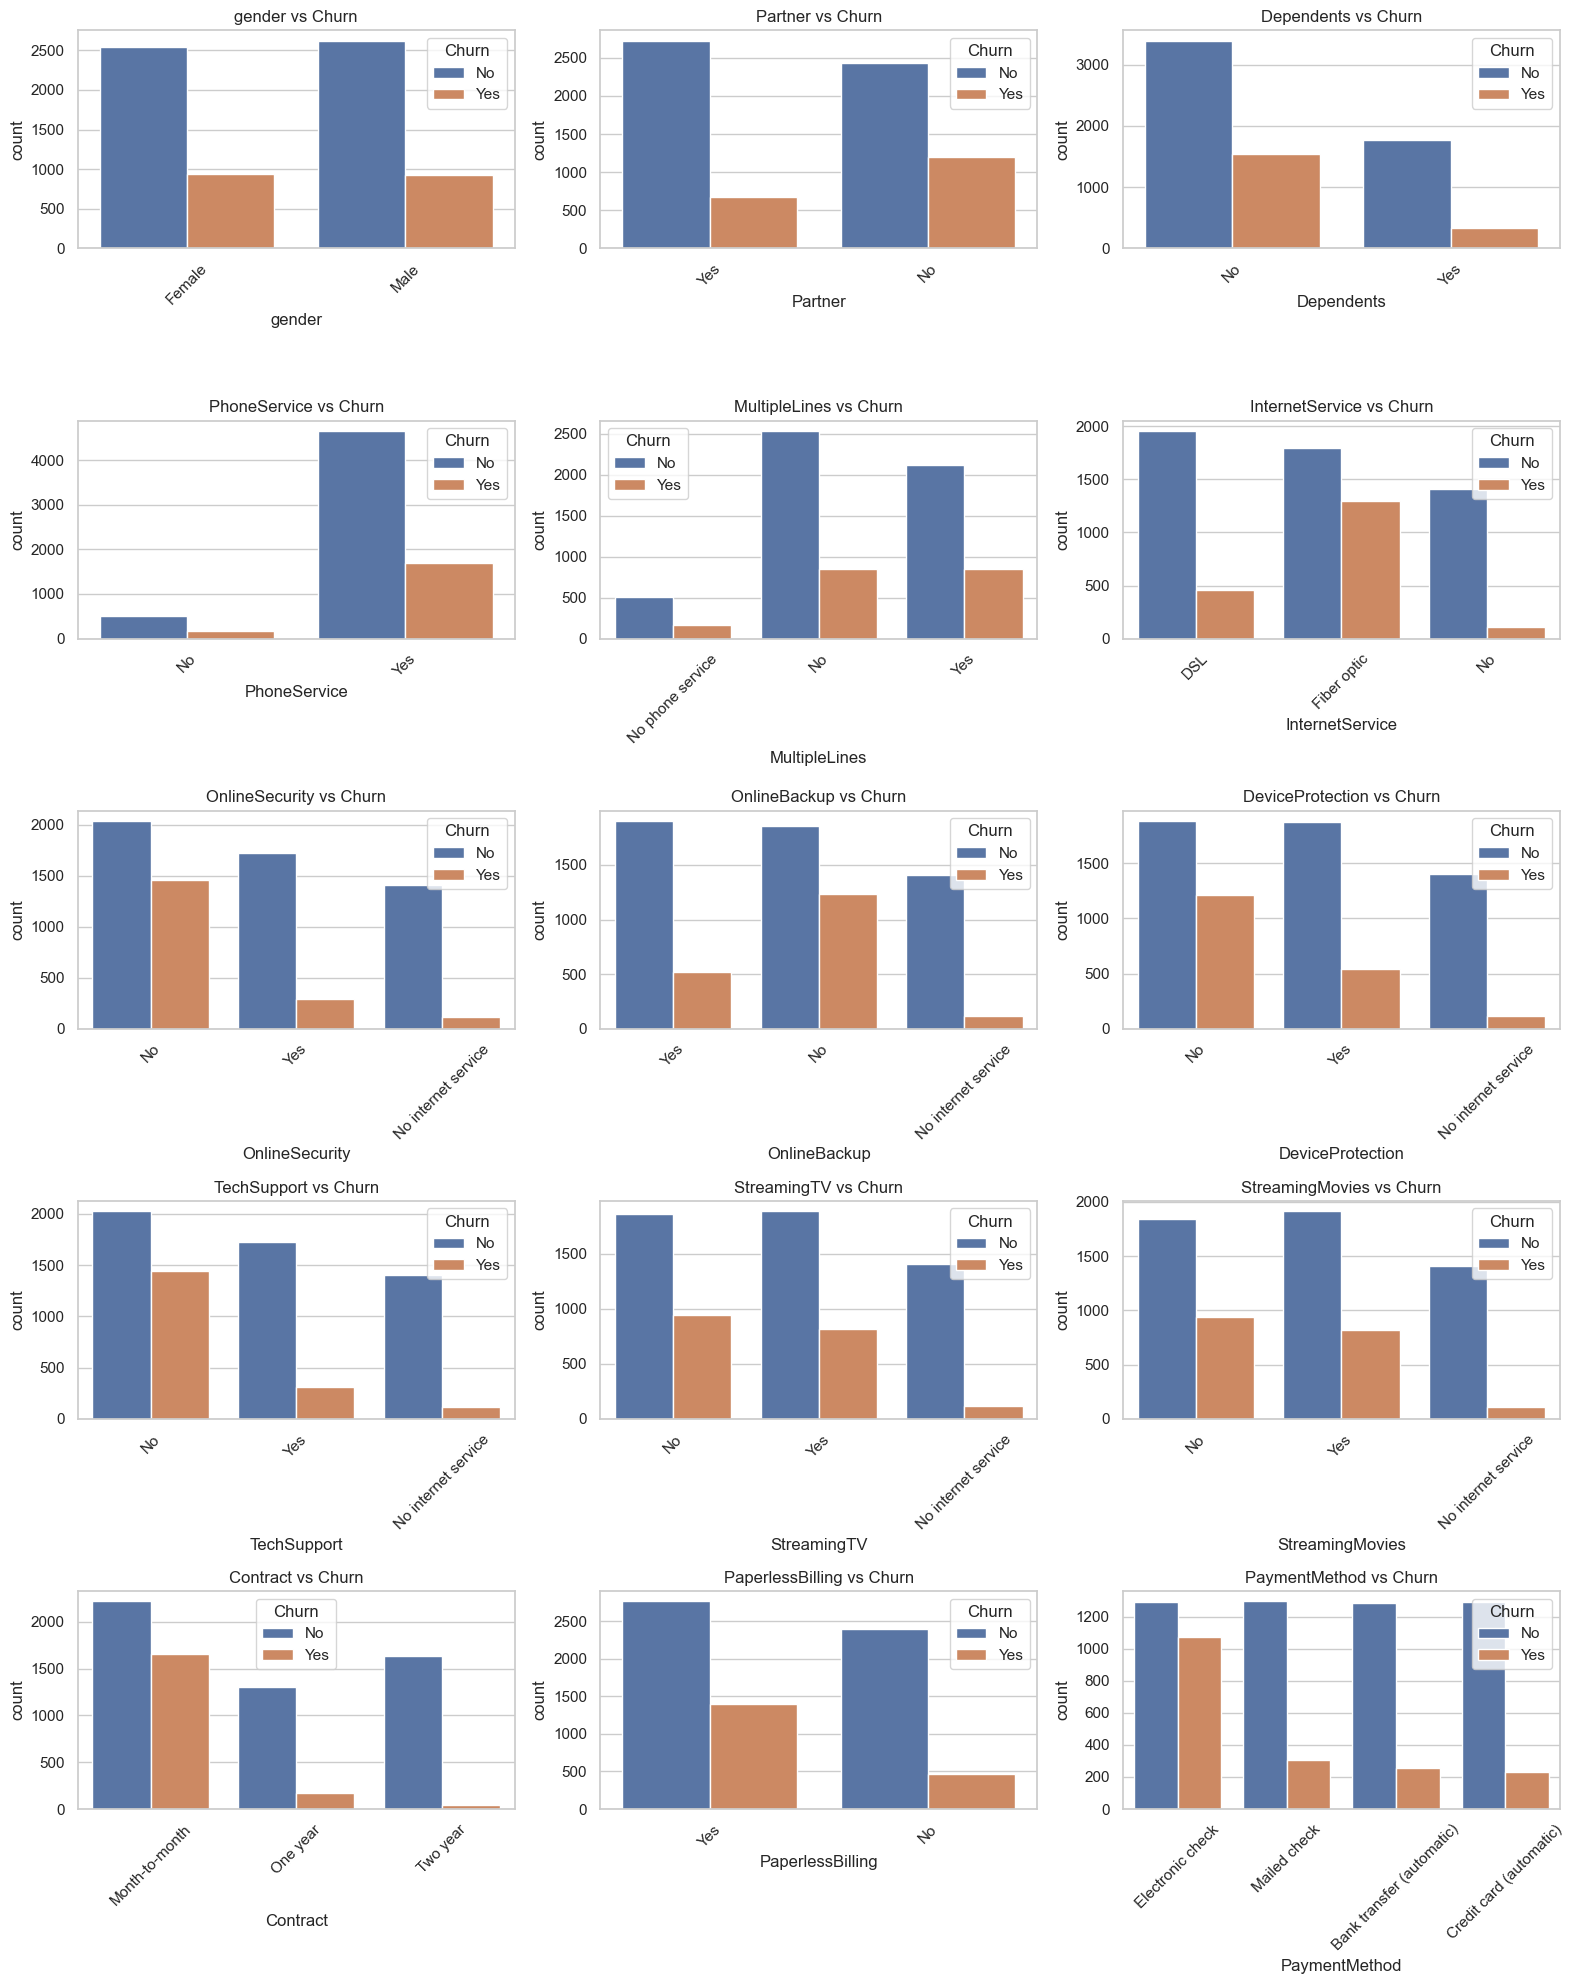

In [15]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

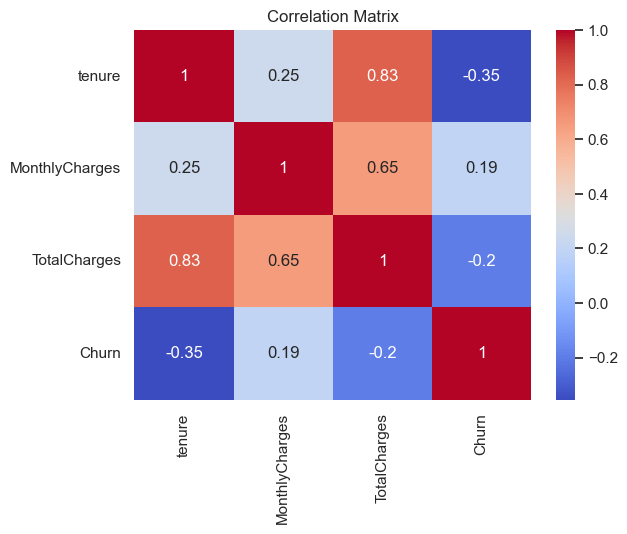

In [16]:
corr = df[numerical_cols + ['Churn']].copy()
corr['Churn'] = corr['Churn'].map({'Yes': 1, 'No': 0})

sns.heatmap(corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Key Observations:
- Monthly and total charges are right-skewed and positively correlated with churn.
- Categorical variables like contract type, tech support, online security show strong churn patterns.
- Some variables will need to be one-hot encoded.
- Target imbalance exists (~73% No, 27% Yes), which we'll handle later during modeling.

Next Step → Preprocess data and train baseline model with MLflow logging.